In [1]:
import shap
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
shap.initjs()

In [2]:
# 加载示例数据集
data = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 训练随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
pre_mean = np.mean(model.predict(X_test))
pre_mean

0.6403508771929824

PermutationExplainer explainer: 115it [00:10,  2.06s/it]                                                               


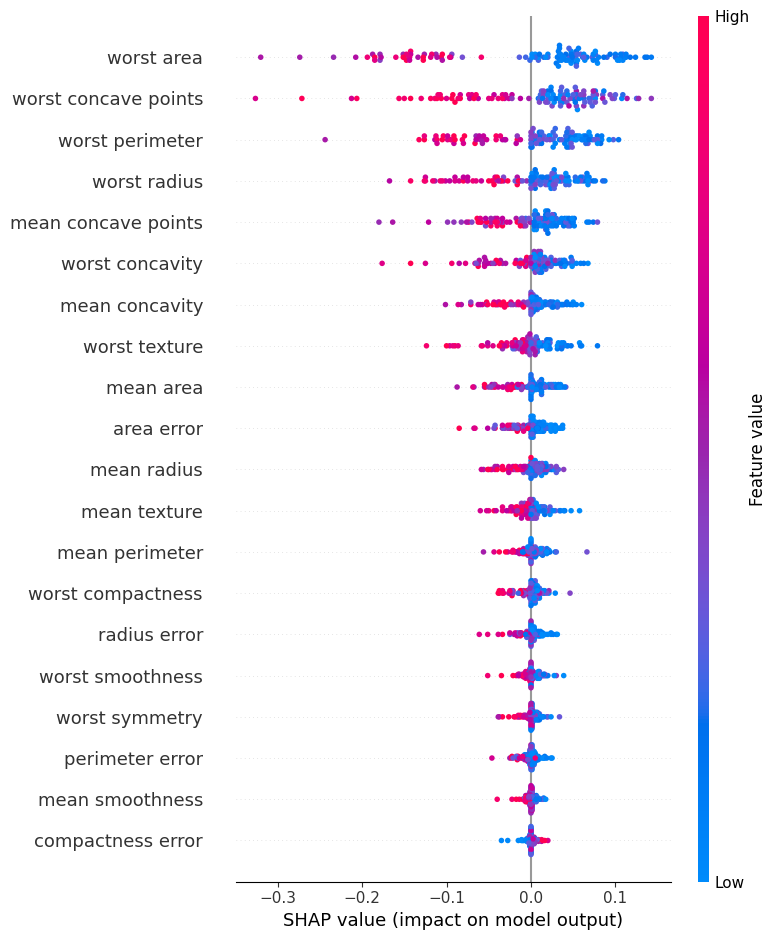

In [4]:
# 创建PermutationExplainer
explainer = shap.PermutationExplainer(model.predict, X_test)

# 解释样本点
shap_values = explainer.shap_values(X_test)

# 生成摘要图
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)  # 替换特征名

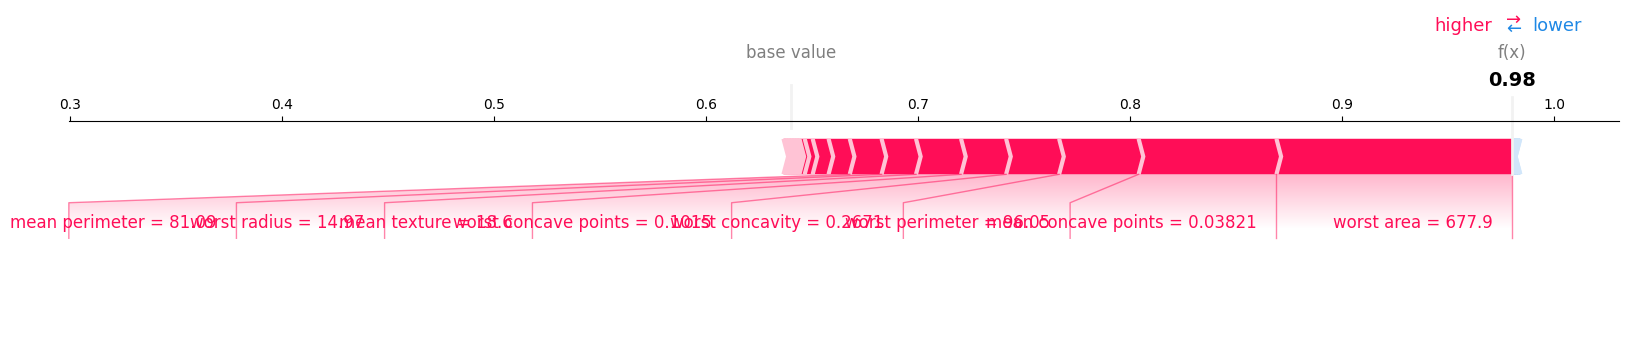

[[0.03 0.97]]


In [16]:
# Explain the chosen sample
shap_values = explainer.shap_values(X_test[0].reshape(1,-1))

# Generate a force plot for the chosen sample
# shap.force_plot(explainer.expected_value, shap_values, sample_to_explain, feature_names=data.feature_names)
shap.force_plot(pre_mean, shap_values, X_test[0], feature_names=data.feature_names,matplotlib=True)
print(model.predict_proba(X_test[0].reshape(1,-1)))